# Data Exploration Continued

**Author:** Elise Chessman

As I have written before, I want to compare the potential for displacement in more urban settings and more rural areas that had been former mining communities. I'm interested in assessing if displacement occurs more dramatically in communities with a lack of economic diversity. For this week, I started to explore some of the mine data out there, and also did another dive into some ACS data to examine a different indicator for displacement.

In [1]:
# First I'll inport the libraries that I need to read, display, and map all of my data for this notebook properly: 
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

import folium

## Mines

Here's data from the USGS on "Mine plants and operations for commodities monitored by the National Minerals Information Center of the USGS. Operations included are those considered active in 2003 and surveyed by the USGS." Here's the link to where I got it: https://mrdata.usgs.gov/mineplant/

I'll explore this data a bit here: 

In [2]:
zipfile = "mineplant-fUS08.zip"
mining = gpd.read_file(zipfile)

In [3]:
mining.shape

(153, 10)

In [4]:
type(mining)

geopandas.geodataframe.GeoDataFrame

In [5]:
mining.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rec_no      153 non-null    int64   
 1   commodity   153 non-null    object  
 2   site_name   153 non-null    object  
 3   company_na  153 non-null    object  
 4   state_loca  153 non-null    object  
 5   county      153 non-null    object  
 6   latitude    153 non-null    float64 
 7   longitude   153 non-null    float64 
 8   plant_min   153 non-null    object  
 9   geometry    153 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(6)
memory usage: 12.1+ KB


<AxesSubplot:>

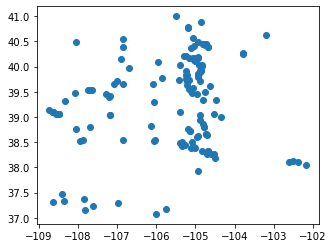

In [6]:
mining.plot()

In [7]:
mining.head()

rec_no              commodity                        site_name  \
0     117              Bentonite  Triangle Vol-Quad Volcano Group   
1     204                 Cement                      Lyons Plant   
2     205                 Cement                   Florence Plant   
3     341  Common Clay and Shale                    Hogback 3 & 4   
4     342  Common Clay and Shale                          Pioneer   

                 company_na state_loca   county  latitude  longitude  \
0           First Bentonite   Colorado  Fremont    38.418   -105.344   
1                 Cemex USA   Colorado  Boulder    40.218   -105.262   
2           Holcim (US) Inc   Colorado  Fremont    38.383   -104.999   
3  Robinson Brick & Tile Co   Colorado  Douglas    39.481   -105.081   
4  Robinson Brick & Tile Co   Colorado  Douglas    39.486   -104.756   

  plant_min                     geometry  
0         M  POINT (-105.34400 38.41800)  
1         P  POINT (-105.26200 40.21800)  
2         P  POINT (-104.99900 38.38300)  
3       M/P  POINT (-105.08100 39.48100)  
4       M/P  POINT (-104.75600 39.48600)

Ok great! An awesome next step for me would be to figure out how to overlay these mine sites as a point layer on my map below of rent burdened counties to see if rent burden correlates with mining as an industry. I could then do a spatial join somehow and potentially summarize each of those counties to see how many mines were located within them. I'm struggling to figure out how to map these mining sites on the same map as my census exploration below right now, so I'll table this for now. I also think this tells me the story of what is going on right now with the mining industry rather than helping me see if historically mining turned tourism-dominated towns are particularly rent burdened and displacement prone. A similar spatial join with my historic mine data (below) would certainly be more illuminating, but I'm struggling to clean up and work with that data. More on that below.

## Historic Mines 

This is a really cool dataset that I found from the USGS. It shows "symbols indicating mining-related features digitized from historical USGS topographic maps in the western part of the conterminous US. Includes prospect pits, mine shafts and adits, quarries, open-pit mines, tailings piles and ponds, gravel and borrow pits, and other features." 

Historic mining info downloaded from here: https://mrdata.usgs.gov/usmin/


In [8]:
zipfile2 = "usmin-CO (1).zip"
mining_hist = gpd.read_file(zipfile2)

In [9]:
mining_hist.info

<bound method DataFrame.info of       STATE       COUNTY      FTR_TYPE            FTR_NAME  FTR_AZIMUT  \
0        CO   Las Animas          Adit       Jeffryes Mine       262.0   
1        CO   Las Animas          Adit          Viola Mine       222.0   
2        CO       Gilpin          Adit                None        88.0   
3        CO  Clear Creek          Adit                None       212.0   
4        CO      Boulder          Adit  Seventhirty Tunnel       192.0   
...     ...          ...           ...                 ...         ...   
43292    CO      Boulder        Quarry                None         0.0   
43293    CO      Fremont        Quarry                None         0.0   
43294    CO      Fremont        Quarry                None         0.0   
43295    CO       Moffat    Strip Mine                None         0.0   
43296    CO     Montrose  Uranium Mine   Uranium Girl Mine         0.0   

           TOPO_NAME  TOPO_DATE TOPO_SCALE COMPILEDBY  \
0           Trinidad  

<AxesSubplot:>

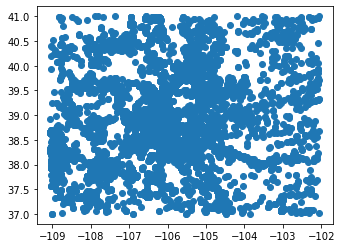

In [10]:
mining_hist.plot()

There is obviously a lot going on here, probably more than I want to use since there are very dense points over the entire state. I'm going to look into how I can clean this up:

In [11]:
mining_hist.head()

STATE       COUNTY FTR_TYPE            FTR_NAME  FTR_AZIMUT      TOPO_NAME  \
0    CO   Las Animas     Adit       Jeffryes Mine       262.0       Trinidad   
1    CO   Las Animas     Adit          Viola Mine       222.0         Madrid   
2    CO       Gilpin     Adit                None        88.0   Central City   
3    CO  Clear Creek     Adit                None       212.0  Idaho Springs   
4    CO      Boulder     Adit  Seventhirty Tunnel       192.0      Nederland   

   TOPO_DATE TOPO_SCALE COMPILEDBY               REMARKS     GDA_ID    SCANID  \
0       1951      24000       USGS  Labeled as inactive.  5357027.0  401981.0   
1       1951      24000       USGS                  None  5352739.0  233682.0   
2       1972      24000       USGS                  None  5347903.0  232523.0   
3       1957      24000       USGS                  None  5351401.0  450676.0   
4       1972      24000       USGS                  None  5353811.0  233929.0   

                      geometry  
0  POINT (-104.52858 37.12719)  
1  POINT (-104.68486 37.21345)  
2  POINT (-105.50356 39.79395)  
3  POINT (-105.61787 39.71612)  
4  POINT (-105.58549 39.98335)

In [12]:
list(mining_hist)

['STATE',
 'COUNTY',
 'FTR_TYPE',
 'FTR_NAME',
 'FTR_AZIMUT',
 'TOPO_NAME',
 'TOPO_DATE',
 'TOPO_SCALE',
 'COMPILEDBY',
 'REMARKS',
 'GDA_ID',
 'SCANID',
 'geometry']

In [13]:
mining_hist.sample(10)

STATE      COUNTY      FTR_TYPE FTR_NAME  FTR_AZIMUT     TOPO_NAME  \
3826     CO     Dolores          Adit     None       347.0          Rico   
9327     CO    Montrose    Gravel Pit     None         0.0    Moore Mesa   
21376    CO    San Juan  Prospect Pit     None         0.0       Ironton   
12712    CO      Gilpin    Mine Shaft     None         0.0  Central City   
42745    CO  San Miguel  Prospect Pit     None         0.0    Slick Rock   
42209    CO        Mesa  Prospect Pit     None         0.0       Gateway   
26237    CO      Pitkin  Prospect Pit     None         0.0         Aspen   
22946    CO     Chaffee  Prospect Pit     None         0.0      St. Elmo   
31625    CO    San Juan  Prospect Pit     None         0.0     Silverton   
41068    CO    Montrose  Prospect Pit     None         0.0         Nucla   

       TOPO_DATE TOPO_SCALE COMPILEDBY REMARKS     GDA_ID    SCANID  \
3826        1960      24000       USGS    None  5355259.0  234259.0   
9327        1994      24000       USGS    None  5353389.0  233820.0   
21376       1955      24000       USGS    None  5351527.0  233395.0   
12712       1972      24000       USGS    None  5347903.0  232523.0   
42745       1960      62500       USGS    None  5358873.0  402623.0   
42209       1960      62500       USGS    None  5358403.0  233060.0   
26237       1960      24000       USGS    None  5346465.0  232167.0   
22946       1982      24000       USGS    None  5355631.0  451193.0   
31625       1955      24000       USGS    None  5355977.0  234430.0   
41068       1960      62500       USGS    None  5358729.0  402649.0   

                          geometry  
3826   POINT (-108.01607 37.70087)  
9327   POINT (-108.37522 38.42725)  
21376  POINT (-107.63663 37.89622)  
12712  POINT (-105.51364 39.78823)  
42745  POINT (-108.79878 38.08873)  
42209  POINT (-108.77504 38.54055)  
26237  POINT (-106.81474 39.13716)  
22946  POINT (-106.35768 38.66338)  
31625  POINT (-107.63063 37.82559)  
41068  POINT (-108.72860 38.35814)

In [14]:
mining_hist['FTR_TYPE'].value_counts()

Prospect Pit                            24416
Adit                                    10545
Mine Shaft                               3980
Gravel Pit                               2414
Open Pit Mine                             584
Quarry                                    541
Open Pit Mine or Quarry                   195
Gravel/Borrow Pit - Undifferentiated      140
Mine                                      131
Clay Pit                                  101
Air Shaft                                  80
Borrow Pit                                 77
Sand Pit                                   32
Strip Mine                                 20
Placer Mine                                13
Mill Site                                  11
Coal Mine                                   6
Quarry - Rock                               2
Shale Pit                                   2
Uranium Mine                                2
Glory Hole                                  1
Diggings                          

In [15]:
mining_hist['TOPO_DATE'].value_counts()

1955    11169
1970     3948
1972     2931
1960     2713
1962     2582
        ...  
1935        1
1937        1
1929        1
1933        1
1905        1
Name: TOPO_DATE, Length: 73, dtype: int64

This is a massive data set, and it compiles any mining related activity that appeared on USGS topographic maps from 1955 up through the 1980s. To save some space in my notebook, I cleaned up this dataset in the notebook labeled **"hist_minesnew.ipynb."** I exported the cleaned up dataset there and then brought it back in as a geojson to this notebook. Take a look to see how I was able to separate just my mine features! 


## Part 2 - More Indicators for Displacement 

After examing race for last week's assignment, I realized that it may not be the best indicator of change and shifting demographics for Colorado, nor would it be great indicator of displacement. I'm going to instead use the ACS 2019 data to explore which counties in the state of Colorado are most burdened by rent. 

I'll start by exploring my data a bit as we have already done before:

In [16]:
gdf = gpd.read_file('acs2019_5yr_B25070_05000US08045.geojson')

In [17]:
gdf.shape

(65, 25)

In [18]:
gdf.head()

geoid                  name  B25070001  B25070001, Error  B25070002  \
0     04000US08              Colorado   747259.0            5909.0    22676.0   
1  05000US08001      Adams County, CO    56242.0            1296.0     1211.0   
2  05000US08003    Alamosa County, CO     2600.0             307.0      117.0   
3  05000US08005   Arapahoe County, CO    87669.0            1537.0     2146.0   
4  05000US08007  Archuleta County, CO     1628.0             264.0       65.0   

   B25070002, Error  B25070003  B25070003, Error  B25070004  B25070004, Error  \
0            1024.0    51994.0            1888.0    90813.0            2384.0   
1             278.0     3017.0             416.0     5779.0             511.0   
2              78.0      132.0              62.0      457.0             202.0   
3             341.0     4980.0             530.0    10503.0             714.0   
4              66.0      184.0             106.0      139.0              73.0   

   ...  B25070007, Error  B25070008  B25070008, Error  B25070009  \
0  ...            2231.0    50078.0            1820.0    70201.0   
1  ...             551.0     4648.0             503.0     6100.0   
2  ...             106.0      184.0             107.0      232.0   
3  ...             702.0     6365.0             543.0     9356.0   
4  ...              97.0      115.0              91.0      207.0   

   B25070009, Error  B25070010  B25070010, Error  B25070011  B25070011, Error  \
0            1841.0   172202.0            2909.0    36645.0            1365.0   
1             536.0    12992.0             791.0     2187.0             385.0   
2             102.0      529.0             166.0      182.0              68.0   
3             721.0    19876.0            1147.0     3093.0             401.0   
4             109.0      245.0              99.0       70.0              49.0   

                                            geometry  
0  MULTIPOLYGON (((-109.05095 40.22265, -109.0509...  
1  MULTIPOLYGON (((-104.60700 39.89941, -104.6071...  
2  MULTIPOLYGON (((-106.03930 37.57699, -106.0393...  
3  MULTIPOLYGON (((-104.79137 39.56609, -104.7928...  
4  MULTIPOLYGON (((-107.25497 37.00002, -107.2553...  

[5 rows x 25 columns]

<AxesSubplot:>

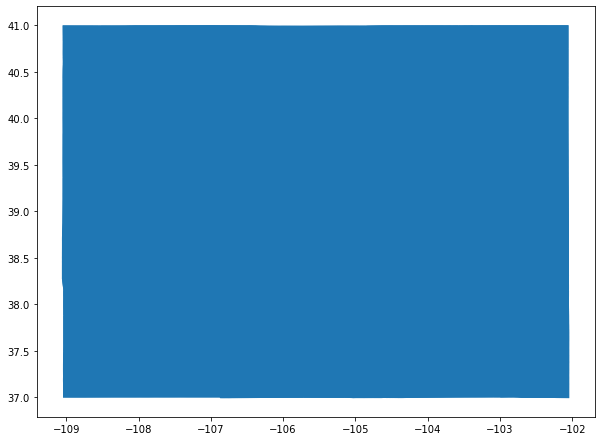

In [19]:
gdf.plot(figsize=(10,10))

In [20]:
 gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             65 non-null     object  
 1   name              65 non-null     object  
 2   B25070001         65 non-null     float64 
 3   B25070001, Error  65 non-null     float64 
 4   B25070002         65 non-null     float64 
 5   B25070002, Error  65 non-null     float64 
 6   B25070003         65 non-null     float64 
 7   B25070003, Error  65 non-null     float64 
 8   B25070004         65 non-null     float64 
 9   B25070004, Error  65 non-null     float64 
 10  B25070005         65 non-null     float64 
 11  B25070005, Error  65 non-null     float64 
 12  B25070006         65 non-null     float64 
 13  B25070006, Error  65 non-null     float64 
 14  B25070007         65 non-null     float64 
 15  B25070007, Error  65 non-null     float64 
 16  B25070008         65

In [21]:
list(gdf)

['geoid',
 'name',
 'B25070001',
 'B25070001, Error',
 'B25070002',
 'B25070002, Error',
 'B25070003',
 'B25070003, Error',
 'B25070004',
 'B25070004, Error',
 'B25070005',
 'B25070005, Error',
 'B25070006',
 'B25070006, Error',
 'B25070007',
 'B25070007, Error',
 'B25070008',
 'B25070008, Error',
 'B25070009',
 'B25070009, Error',
 'B25070010',
 'B25070010, Error',
 'B25070011',
 'B25070011, Error',
 'geometry']

I don't need to hang onto those error columns, so I'll clear those out and rename my columns again:

In [22]:
columns_to_keep = ['geoid',
 'name',
 'B25070001',
 'B25070002',
 'B25070003',
 'B25070004',
 'B25070005',
 'B25070006',
 'B25070007',
 'B25070008',
 'B25070009',
 'B25070010',
 'B25070011',
 'geometry']
gdf = gdf[columns_to_keep]

In [23]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Less than 10.0 percent',
 '10.0 to 14.9 percent',
 '15.0 to 19.9 percent',
 '20.0 to 24.9 percent',
 '25.0 to 29.9 percent',
 '30.0 to 34.9 percent',
 '35.0 to 39.9 percent',
 '40.0 to 49.9 percent',
 '50.0 percent or more',
 'Not computed,',
 'geometry']

Can't forget to drop my summary column and check to make sure that my columns look good:

In [24]:
gdf=gdf.drop([0])
gdf.head()

geoid                  name    Total  Less than 10.0 percent  \
1  05000US08001      Adams County, CO  56242.0                  1211.0   
2  05000US08003    Alamosa County, CO   2600.0                   117.0   
3  05000US08005   Arapahoe County, CO  87669.0                  2146.0   
4  05000US08007  Archuleta County, CO   1628.0                    65.0   
5  05000US08009       Baca County, CO    482.0                    43.0   

   10.0 to 14.9 percent  15.0 to 19.9 percent  20.0 to 24.9 percent  \
1                3017.0                5779.0                7481.0   
2                 132.0                 457.0                 260.0   
3                4980.0               10503.0               11662.0   
4                 184.0                 139.0                 304.0   
5                  50.0                  48.0                  35.0   

   25.0 to 29.9 percent  30.0 to 34.9 percent  35.0 to 39.9 percent  \
1                6828.0                5999.0                4648.0   
2                 291.0                 216.0                 184.0   
3               10640.0                9048.0                6365.0   
4                  86.0                 213.0                 115.0   
5                  70.0                  13.0                  12.0   

   40.0 to 49.9 percent  50.0 percent or more  Not computed,  \
1                6100.0               12992.0         2187.0   
2                 232.0                 529.0          182.0   
3                9356.0               19876.0         3093.0   
4                 207.0                 245.0           70.0   
5                  31.0                  53.0          127.0   

                                            geometry  
1  MULTIPOLYGON (((-104.60700 39.89941, -104.6071...  
2  MULTIPOLYGON (((-106.03930 37.57699, -106.0393...  
3  MULTIPOLYGON (((-104.79137 39.56609, -104.7928...  
4  MULTIPOLYGON (((-107.25497 37.00002, -107.2553...  
5  MULTIPOLYGON (((-102.84192 36.99960, -102.8419...

I'll try a histogram for good measure again as well:

<AxesSubplot:ylabel='Frequency'>

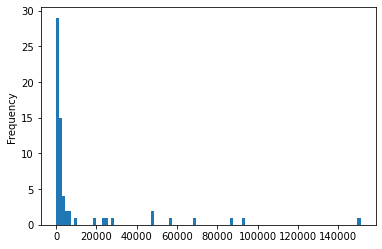

In [25]:
gdf['Total'].plot.hist(bins=100)

I assume that the massive blip on this distribution is just because Denver County is so much more populous than the rest of the state, but I'll sort my data by the total population by county to confirm:

In [26]:
gdf_sortpopulation = gdf.sort_values(by='Total',ascending = False)
gdf_sortpopulation.head(5)

geoid                  name     Total  Less than 10.0 percent  \
17  05000US08031     Denver County, CO  151119.0                  4464.0   
22  05000US08041    El Paso County, CO   92830.0                  2525.0   
3   05000US08005   Arapahoe County, CO   87669.0                  2146.0   
31  05000US08059  Jefferson County, CO   68098.0                  1461.0   
1   05000US08001      Adams County, CO   56242.0                  1211.0   

    10.0 to 14.9 percent  15.0 to 19.9 percent  20.0 to 24.9 percent  \
17               12662.0               20532.0               20861.0   
22                6382.0               11317.0               12503.0   
3                 4980.0               10503.0               11662.0   
31                4546.0                8603.0                9406.0   
1                 3017.0                5779.0                7481.0   

    25.0 to 29.9 percent  30.0 to 34.9 percent  35.0 to 39.9 percent  \
17               18346.0               12909.0                9451.0   
22               10368.0                9329.0                7095.0   
3                10640.0                9048.0                6365.0   
31                7868.0                6116.0                4561.0   
1                 6828.0                5999.0                4648.0   

    40.0 to 49.9 percent  50.0 percent or more  Not computed,  \
17               12912.0               33031.0         5951.0   
22                8770.0               21138.0         3403.0   
3                 9356.0               19876.0         3093.0   
31                6695.0               16272.0         2570.0   
1                 6100.0               12992.0         2187.0   

                                             geometry  
17  MULTIPOLYGON (((-105.10992 39.62723, -105.1099...  
22  MULTIPOLYGON (((-104.93899 38.79201, -104.9389...  
3   MULTIPOLYGON (((-104.79137 39.56609, -104.7928...  
31  MULTIPOLYGON (((-105.39835 39.71715, -105.3983...  
1   MULTIPOLYGON (((-104.60700 39.89941, -104.6071...

I now am going to normalize the data again, to see what percent of the population is in each of these brackets of rent/income percentages and map them properly:

In [27]:
gdf['Percent Pop. with Rent Less than 10 percent of Income'] = gdf['Less than 10.0 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 10-14.9 percent of Income'] = gdf['10.0 to 14.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 15-19.9 percent of Income'] = gdf['15.0 to 19.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 20-24.9 percent of Income'] = gdf['20.0 to 24.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 25-29.9 percent of Income'] = gdf['25.0 to 29.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 30-34.9 percent of Income'] = gdf['30.0 to 34.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 35-39.9 percent of Income'] = gdf['35.0 to 39.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 40-49.9 percent of Income'] = gdf['40.0 to 49.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 50 percent or more of Income'] = gdf['50.0 percent or more']/gdf['Total']*100
gdf['Percentage not computed'] = gdf['Not computed,']/gdf['Total']*100

In [28]:
gdf.head()

geoid                  name    Total  Less than 10.0 percent  \
1  05000US08001      Adams County, CO  56242.0                  1211.0   
2  05000US08003    Alamosa County, CO   2600.0                   117.0   
3  05000US08005   Arapahoe County, CO  87669.0                  2146.0   
4  05000US08007  Archuleta County, CO   1628.0                    65.0   
5  05000US08009       Baca County, CO    482.0                    43.0   

   10.0 to 14.9 percent  15.0 to 19.9 percent  20.0 to 24.9 percent  \
1                3017.0                5779.0                7481.0   
2                 132.0                 457.0                 260.0   
3                4980.0               10503.0               11662.0   
4                 184.0                 139.0                 304.0   
5                  50.0                  48.0                  35.0   

   25.0 to 29.9 percent  30.0 to 34.9 percent  35.0 to 39.9 percent  ...  \
1                6828.0                5999.0                4648.0  ...   
2                 291.0                 216.0                 184.0  ...   
3               10640.0                9048.0                6365.0  ...   
4                  86.0                 213.0                 115.0  ...   
5                  70.0                  13.0                  12.0  ...   

   Percent Pop. with Rent Less than 10 percent of Income  \
1                                           2.153195       
2                                           4.500000       
3                                           2.447844       
4                                           3.992629       
5                                           8.921162       

   Percent Pop. with Rent 10-14.9 percent of Income  \
1                                          5.364318   
2                                          5.076923   
3                                          5.680457   
4                                         11.302211   
5                                         10.373444   

   Percent Pop. with Rent 15-19.9 percent of Income  \
1                                         10.275239   
2                                         17.576923   
3                                         11.980289   
4                                          8.538084   
5                                          9.958506   

  Percent Pop. with Rent 20-24.9 percent of Income  \
1                                        13.301447   
2                                        10.000000   
3                                        13.302308   
4                                        18.673219   
5                                         7.261411   

   Percent Pop. with Rent 25-29.9 percent of Income  \
1                                         12.140393   
2                                         11.192308   
3                                         12.136559   
4                                          5.282555   
5                                         14.522822   

   Percent Pop. with Rent 30-34.9 percent of Income  \
1                                         10.666406   
2                                          8.307692   
3                                         10.320638   
4                                         13.083538   
5                                          2.697095   

   Percent Pop. with Rent 35-39.9 percent of Income  \
1                                          8.264286   
2                                          7.076923   
3                                          7.260263   
4                                          7.063882   
5                                          2.489627   

   Percent Pop. with Rent 40-49.9 percent of Income  \
1                                         10.845987   
2                                          8.923077   
3                                         10.671959   
4                                         12.714988   
5                                          6.431535   

   Percen

And now to map the percent of the population with rent encompassing over 50% of their income to get a sense of this data:

<AxesSubplot:>

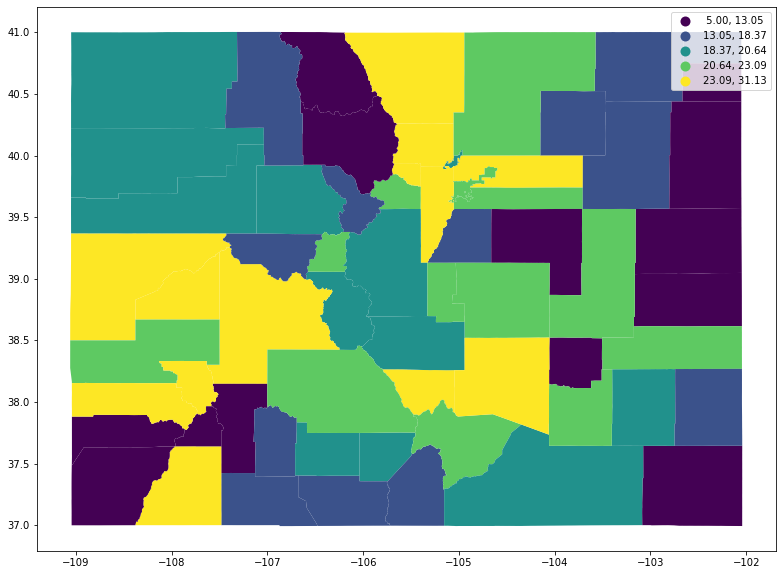

In [29]:
gdf.plot(figsize=(15,10),
                 column='Percent Pop. with Rent 50 percent or more of Income',
                 legend=True, 
                 scheme='quantiles')

According to the California Budget and Policy center, "households paying more than 30 percent of income toward housing are considered housing “cost-burdened,” and those with housing costs that exceed half of income are considered “severely” cost-burdened." (https://calbudgetcenter.org/resources/throughout-the-state-californians-pay-more-than-they-can-afford-for-housing/). 

I'll go off this definition for looking at rent burdened households across the state.

Using this cutoff, I am going to create two new columns and break up my data into two groups: one where their rent is 30% or greater of their income, and one where their rent is less than 30% of their income:

In [30]:
gdf['Percent Pop. with Rent 30 percent or more of Income'] = gdf['Percent Pop. with Rent 30-34.9 percent of Income']+gdf['Percent Pop. with Rent 35-39.9 percent of Income']+gdf['Percent Pop. with Rent 40-49.9 percent of Income']+gdf['Percent Pop. with Rent 50 percent or more of Income']
gdf['Percent Pop. with Rent Less than 30 percent of income'] = gdf['Percent Pop. with Rent Less than 10 percent of Income']+gdf['Percent Pop. with Rent 10-14.9 percent of Income']+gdf['Percent Pop. with Rent 15-19.9 percent of Income']+gdf['Percent Pop. with Rent 20-24.9 percent of Income']+gdf['Percent Pop. with Rent 25-29.9 percent of Income']
gdf.head()

geoid                  name    Total  Less than 10.0 percent  \
1  05000US08001      Adams County, CO  56242.0                  1211.0   
2  05000US08003    Alamosa County, CO   2600.0                   117.0   
3  05000US08005   Arapahoe County, CO  87669.0                  2146.0   
4  05000US08007  Archuleta County, CO   1628.0                    65.0   
5  05000US08009       Baca County, CO    482.0                    43.0   

   10.0 to 14.9 percent  15.0 to 19.9 percent  20.0 to 24.9 percent  \
1                3017.0                5779.0                7481.0   
2                 132.0                 457.0                 260.0   
3                4980.0               10503.0               11662.0   
4                 184.0                 139.0                 304.0   
5                  50.0                  48.0                  35.0   

   25.0 to 29.9 percent  30.0 to 34.9 percent  35.0 to 39.9 percent  ...  \
1                6828.0                5999.0                4648.0  ...   
2                 291.0                 216.0                 184.0  ...   
3               10640.0                9048.0                6365.0  ...   
4                  86.0                 213.0                 115.0  ...   
5                  70.0                  13.0                  12.0  ...   

   Percent Pop. with Rent 15-19.9 percent of Income  \
1                                         10.275239   
2                                         17.576923   
3                                         11.980289   
4                                          8.538084   
5                                          9.958506   

   Percent Pop. with Rent 20-24.9 percent of Income  \
1                                         13.301447   
2                                         10.000000   
3                                         13.302308   
4                                         18.673219   
5                                          7.261411   

   Percent Pop. with Rent 25-29.9 percent of Income  \
1                                         12.140393   
2                                         11.192308   
3                                         12.136559   
4                                          5.282555   
5                                         14.522822   

  Percent Pop. with Rent 30-34.9 percent of Income  \
1                                        10.666406   
2                                         8.307692   
3                                        10.320638   
4                                        13.083538   
5                                         2.697095   

   Percent Pop. with Rent 35-39.9 percent of Income  \
1                                          8.264286   
2                                          7.076923   
3                                          7.260263   
4                                          7.063882   
5                                          2.489627   

   Percent Pop. with Rent 40-49.9 percent of Income  \
1                                         10.845987   
2                                          8.923077   
3                                         10.671959   
4                                         12.714988   
5                                          6.431535   

   Percent Pop. with Rent 50 percent or more of Income  \
1                                          23.100174     
2                                          20.346154     
3                                          22.671640     
4                                          15.049140     
5                                          10.995851     

   Percentage not computed  \
1                 3.888553   
2                 7.000000   
3                 3.528043   
4                 4.299754   
5                26.348548   

   Percent Pop. with Rent 30 percent or more of Income  \
1                                          52.876854     
2                                          44.653846   

Now I'll create two maps based off of these groupings:

Text(0.5, 1.0, 'Percent Pop. with Rent Less than 30 percent of income')

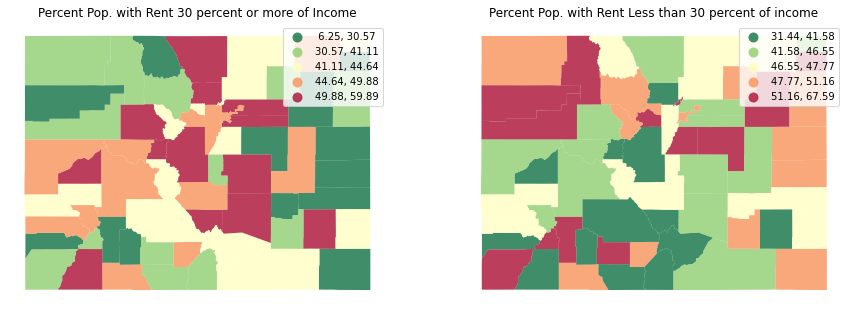

In [31]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent rent burdened map on the left
gdf.plot(column='Percent Pop. with Rent 30 percent or more of Income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Pop. with Rent 30 percent or more of Income")

# percent black map on the right
gdf.plot(column='Percent Pop. with Rent Less than 30 percent of income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Pop. with Rent Less than 30 percent of income")

Finally, I'll make a web map that shows where throughout the state is most rent burdened. Hopefully my next step will be to add the historic mine site data to this map and explore if there is a relationship through a spatial join. But for now, I'll start by looking at counties where those with rent accounting for over 30% of their income makes up the majority of the population (over 50%). That's kind of a mouthful, but hopefully that makes sense!

In [34]:
counties_gdf = gdf_web_mercator[gdf_web_mercator['Percent Pop. with Rent 30 percent or more of Income'] > 50]
counties_gdf.to_file("rentcounties.geojson", driver = "GeoJSON")

In [33]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

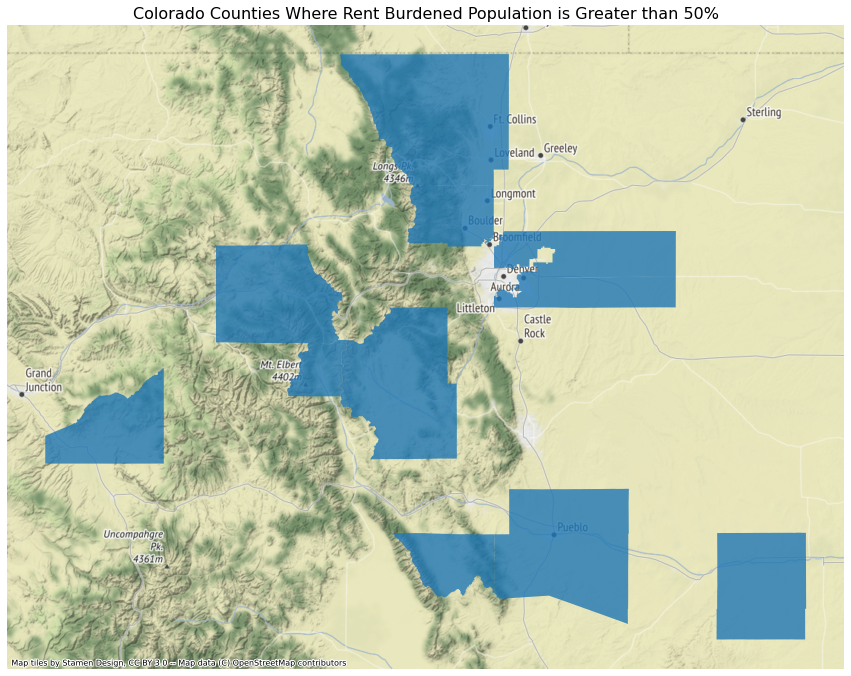

In [33]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Pop. with Rent 30 percent or more of Income'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title("Colorado Counties Where Rent Burdened Population is Greater than 50%",fontsize=16)

# add a basemap
ctx.add_basemap(ax)

# Part 3 - Exploring the Relationship Between Historic Mines and Rent Burden

I want to export just these counties of interest that I have identified as rent burdened to see if there is any relationship between the presence of historic mines. 

First, I'll export it to web mercator so I can work with this dataset on an interactive map later on: 

In [34]:
selected_counties = gdf_web_mercator[gdf_web_mercator['Percent Pop. with Rent 30 percent or more of Income'] > 50]

In [35]:
selected_counties.head()

geoid                 name    Total  Less than 10.0 percent  \
1   05000US08001     Adams County, CO  56242.0                  1211.0   
3   05000US08005  Arapahoe County, CO  87669.0                  2146.0   
6   05000US08011      Bent County, CO    714.0                    23.0   
7   05000US08013   Boulder County, CO  48142.0                  1460.0   
15  05000US08027    Custer County, CO    284.0                     5.0   

    10.0 to 14.9 percent  15.0 to 19.9 percent  20.0 to 24.9 percent  \
1                 3017.0                5779.0                7481.0   
3                 4980.0               10503.0               11662.0   
6                   56.0                  69.0                  33.0   
7                 3073.0                5123.0                5469.0   
15                  65.0                  16.0                  18.0   

    25.0 to 29.9 percent  30.0 to 34.9 percent  35.0 to 39.9 percent  ...  \
1                 6828.0                5999.0                4648.0  ...   
3                10640.0                9048.0                6365.0  ...   
6                   63.0                  98.0                  71.0  ...   
7                 4759.0                4253.0                2906.0  ...   
15                  13.0                  32.0                  19.0  ...   

    Percent Pop. with Rent 15-19.9 percent of Income  \
1                                          10.275239   
3                                          11.980289   
6                                           9.663866   
7                                          10.641436   
15                                          5.633803   

    Percent Pop. with Rent 20-24.9 percent of Income  \
1                                          13.301447   
3                                          13.302308   
6                                           4.621849   
7                                          11.360143   
15                                          6.338028   

    Percent Pop. with Rent 25-29.9 percent of Income  \
1                                          12.140393   
3                                          12.136559   
6                                           8.823529   
7                                           9.885339   
15                                          4.577465   

   Percent Pop. with Rent 30-34.9 percent of Income  \
1                                         10.666406   
3                                         10.320638   
6                                         13.725490   
7                                          8.834282   
15                                        11.267606   

    Percent Pop. with Rent 35-39.9 percent of Income  \
1                                           8.264286   
3                                           7.260263   
6                                           9.943978   
7                                           6.036309   
15                                          6.690141   

    Percent Pop. with Rent 40-49.9 percent of Income  \
1                                          10.845987   
3                                          10.671959   
6                                           7.142857   
7                                           8.643181   
15                                         11.619718   

    Percent Pop. with Rent 50 percent or more of Income  \
1                                           23.100174     
3                                           22.671640     
6                                           20.028011     
7                                           30.962569     
15                                          24.647887     

    Percentage not computed  \
1                  3.888553   
3                  3.528043   
6                 14.985994   
7                  4.220847   
15                 4.577465   

    Percent Pop. with Rent 30 percent or more of Income  \
1                                           52.876854

I'll go ahead and bring back in my cleaned up datasets of selected rent burdened counties and historic mines. 

In [36]:
selected_counties.to_file("selectedcounties.geojson", driver = "GeoJSON")

In [37]:
hist_gdf = gpd.read_file("historic_mines.geojson")

In [38]:
counties_gdf = gpd.read_file("selectedcounties.geojson")

In [39]:
hist_gdf.head()

STATE    COUNTY   FTR_TYPE FTR_NAME  FTR_AZIMUT         TOPO_NAME  \
0    CO   Jackson  Coal Mine     None         0.0          Coalmont   
1    CO   Jackson  Coal Mine     None         0.0          Coalmont   
2    CO   Jackson  Coal Mine     None         0.0          Coalmont   
3    CO  Garfield  Coal Mine     None         0.0             Rifle   
4    CO      Weld  Coal Mine     None         0.0  Milton Reservoir   

   TOPO_DATE TOPO_SCALE COMPILEDBY               REMARKS     GDA_ID    SCANID  \
0       1955      24000       USGS                  None  5348207.0  232591.0   
1       1955      24000       USGS                  None  5348207.0  232591.0   
2       1955      24000       USGS                  None  5348207.0  232591.0   
3       1952      24000       USGS  Labeled as inactive.  5355287.0  451611.0   
4       1950      24000       USGS  Labeled as inactive.  5353203.0  451273.0   

                      geometry  
0  POINT (-106.49284 40.50346)  
1  POINT (-106.49473 40.50247)  
2  POINT (-106.49403 40.50049)  
3  POINT (-107.76933 39.59839)  
4  POINT (-104.74284 40.22302)

In [40]:
counties_gdf.head()

geoid                 name    Total  Less than 10.0 percent  \
0  05000US08001     Adams County, CO  56242.0                  1211.0   
1  05000US08005  Arapahoe County, CO  87669.0                  2146.0   
2  05000US08011      Bent County, CO    714.0                    23.0   
3  05000US08013   Boulder County, CO  48142.0                  1460.0   
4  05000US08027    Custer County, CO    284.0                     5.0   

   10.0 to 14.9 percent  15.0 to 19.9 percent  20.0 to 24.9 percent  \
0                3017.0                5779.0                7481.0   
1                4980.0               10503.0               11662.0   
2                  56.0                  69.0                  33.0   
3                3073.0                5123.0                5469.0   
4                  65.0                  16.0                  18.0   

   25.0 to 29.9 percent  30.0 to 34.9 percent  35.0 to 39.9 percent  ...  \
0                6828.0                5999.0                4648.0  ...   
1               10640.0                9048.0                6365.0  ...   
2                  63.0                  98.0                  71.0  ...   
3                4759.0                4253.0                2906.0  ...   
4                  13.0                  32.0                  19.0  ...   

   Percent Pop. with Rent 20-24.9 percent of Income  \
0                                         13.301447   
1                                         13.302308   
2                                          4.621849   
3                                         11.360143   
4                                          6.338028   

   Percent Pop. with Rent 25-29.9 percent of Income  \
0                                         12.140393   
1                                         12.136559   
2                                          8.823529   
3                                          9.885339   
4                                          4.577465   

   Percent Pop. with Rent 30-34.9 percent of Income  \
0                                         10.666406   
1                                         10.320638   
2                                         13.725490   
3                                          8.834282   
4                                         11.267606   

   Percent Pop. with Rent 35-39.9 percent of Income  \
0                                          8.264286   
1                                          7.260263   
2                                          9.943978   
3                                          6.036309   
4                                          6.690141   

   Percent Pop. with Rent 40-49.9 percent of Income  \
0                                         10.845987   
1                                         10.671959   
2                                          7.142857   
3                                          8.643181   
4                                         11.619718   

   Percent Pop. with Rent 50 percent or more of Income  \
0                                          23.100174     
1                                          22.671640     
2                                          20.028011     
3                                          30.962569     
4                                          24.647887     

   Percentage not computed  \
0                 3.888553   
1                 3.528043   
2                14.985994   
3                 4.220847   
4                 4.577465   

   Percent Pop. with Rent 30 percent or more of Income  \
0                                          52.876854     
1                                          50.924500     
2                                          50.840336     
3                                          54.476341     
4                                          54.225352     

   Percent Pop. with Rent Less than 30 percent of income  \
0                                          43.234593       
1                                

Before making my map, I'm going to rename my columns that I want to display in my map so that there are no spaces.

In [41]:
counties_gdf.columns.to_list()

['geoid',
 'name',
 'Total',
 'Less than 10.0 percent',
 '10.0 to 14.9 percent',
 '15.0 to 19.9 percent',
 '20.0 to 24.9 percent',
 '25.0 to 29.9 percent',
 '30.0 to 34.9 percent',
 '35.0 to 39.9 percent',
 '40.0 to 49.9 percent',
 '50.0 percent or more',
 'Not computed,',
 'Percent Pop. with Rent Less than 10 percent of Income',
 'Percent Pop. with Rent 10-14.9 percent of Income',
 'Percent Pop. with Rent 15-19.9 percent of Income',
 'Percent Pop. with Rent 20-24.9 percent of Income',
 'Percent Pop. with Rent 25-29.9 percent of Income',
 'Percent Pop. with Rent 30-34.9 percent of Income',
 'Percent Pop. with Rent 35-39.9 percent of Income',
 'Percent Pop. with Rent 40-49.9 percent of Income',
 'Percent Pop. with Rent 50 percent or more of Income',
 'Percentage not computed',
 'Percent Pop. with Rent 30 percent or more of Income',
 'Percent Pop. with Rent Less than 30 percent of income',
 'geometry']

In [42]:
counties_gdf.columns = ['geoid',
 'name',
 'Total',
 'Less than 10.0 percent',
 '10.0 to 14.9 percent',
 '15.0 to 19.9 percent',
 '20.0 to 24.9 percent',
 '25.0 to 29.9 percent',
 '30.0 to 34.9 percent',
 '35.0 to 39.9 percent',
 '40.0 to 49.9 percent',
 '50.0 percent or more',
 'Not computed,',
 'Percent Pop. with Rent Less than 10 percent of Income',
 'Percent Pop. with Rent 10-14.9 percent of Income',
 'Percent Pop. with Rent 15-19.9 percent of Income',
 'Percent Pop. with Rent 20-24.9 percent of Income',
 'Percent Pop. with Rent 25-29.9 percent of Income',
 'Percent Pop. with Rent 30-34.9 percent of Income',
 'Percent Pop. with Rent 35-39.9 percent of Income',
 'Percent Pop. with Rent 40-49.9 percent of Income',
 'Percent Pop. with Rent 50 percent or more of Income',
 'Percentage not computed',
 'Percent_Pop_with_Rent_30_percent_or_more_of_Income',
 'Percent_Pop_with_Rent_Less_than_30_percent_of_income',
 'geometry']
counties_gdf.head()

geoid                 name    Total  Less than 10.0 percent  \
0  05000US08001     Adams County, CO  56242.0                  1211.0   
1  05000US08005  Arapahoe County, CO  87669.0                  2146.0   
2  05000US08011      Bent County, CO    714.0                    23.0   
3  05000US08013   Boulder County, CO  48142.0                  1460.0   
4  05000US08027    Custer County, CO    284.0                     5.0   

   10.0 to 14.9 percent  15.0 to 19.9 percent  20.0 to 24.9 percent  \
0                3017.0                5779.0                7481.0   
1                4980.0               10503.0               11662.0   
2                  56.0                  69.0                  33.0   
3                3073.0                5123.0                5469.0   
4                  65.0                  16.0                  18.0   

   25.0 to 29.9 percent  30.0 to 34.9 percent  35.0 to 39.9 percent  ...  \
0                6828.0                5999.0                4648.0  ...   
1               10640.0                9048.0                6365.0  ...   
2                  63.0                  98.0                  71.0  ...   
3                4759.0                4253.0                2906.0  ...   
4                  13.0                  32.0                  19.0  ...   

   Percent Pop. with Rent 20-24.9 percent of Income  \
0                                         13.301447   
1                                         13.302308   
2                                          4.621849   
3                                         11.360143   
4                                          6.338028   

   Percent Pop. with Rent 25-29.9 percent of Income  \
0                                         12.140393   
1                                         12.136559   
2                                          8.823529   
3                                          9.885339   
4                                          4.577465   

   Percent Pop. with Rent 30-34.9 percent of Income  \
0                                         10.666406   
1                                         10.320638   
2                                         13.725490   
3                                          8.834282   
4                                         11.267606   

   Percent Pop. with Rent 35-39.9 percent of Income  \
0                                          8.264286   
1                                          7.260263   
2                                          9.943978   
3                                          6.036309   
4                                          6.690141   

   Percent Pop. with Rent 40-49.9 percent of Income  \
0                                         10.845987   
1                                         10.671959   
2                                          7.142857   
3                                          8.643181   
4                                         11.619718   

   Percent Pop. with Rent 50 percent or more of Income  \
0                                          23.100174     
1                                          22.671640     
2                                          20.028011     
3                                          30.962569     
4                                          24.647887     

   Percentage not computed  \
0                 3.888553   
1                 3.528043   
2                14.985994   
3                 4.220847   
4                 4.577465   

   Percent_Pop_with_Rent_30_percent_or_more_of_Income  \
0                                          52.876854    
1                                          50.924500    
2                                          50.840336    
3                                          54.476341    
4                                          54.225352    

   Percent_Pop_with_Rent_Less_than_30_percent_of_income  \
0                                          43.234593      
1                                        

I want to know how many historic mines there are in each of these counties. To do this, I'll start by dissolving this data so that I get a count mine count per county. I need to create a dummy variable to execute the dissolve, so I'll create a "count" column:

I also want to fix the county name data so that I can easily join it back to my historic mines, where the county is listed without the "

In [43]:
hist_gdf["Count"] = 1

In [ ]:
hist_gdf.head()

Now I'll just take out the columns that I think will be helpful to me, and then dissolve it to get a sum of the historic mines by county: 

In [45]:
columns_to_keep = ["COUNTY", "FTR_TYPE", "TOPO_DATE", "geometry", "Count"]
hist_gdf = hist_gdf[columns_to_keep]

In [46]:
hist_gdf.head()

COUNTY   FTR_TYPE  TOPO_DATE                     geometry  Count
0   Jackson  Coal Mine       1955  POINT (-106.49284 40.50346)      1
1   Jackson  Coal Mine       1955  POINT (-106.49473 40.50247)      1
2   Jackson  Coal Mine       1955  POINT (-106.49403 40.50049)      1
3  Garfield  Coal Mine       1952  POINT (-107.76933 39.59839)      1
4      Weld  Coal Mine       1950  POINT (-104.74284 40.22302)      1

So this is just all of my historic mine data dissolved by county to see which counties have the highest count of mines:

In [47]:
histcounties_gdf = hist_gdf.dissolve(by='COUNTY', aggfunc='sum')

In [48]:
gdf.reset_index(level=0, inplace=True)
histcounties_gdf.head()

geometry  TOPO_DATE  Count
COUNTY                                                                        
Adams      MULTIPOINT (-104.15806 39.98222, -104.15521 39...       3902      2
Archuleta  MULTIPOINT (-107.47515 37.29602, -107.45134 37...       9844      5
Baca       MULTIPOINT (-102.91875 37.52742, -102.78975 37...       3950      2
Bent       MULTIPOINT (-103.35947 38.11065, -103.27756 37...      21582     11
Boulder    MULTIPOINT (-105.65902 40.01106, -105.61338 39...     803255    410

I'll export my data again so that I have a historic mine dataset converted into the correct projection to make sure that they can properly join. Then, I'm going to spatially join the historic mines to my rent burdened counties.

In [49]:
hist_gdf = hist_gdf.to_crs(epsg=3857)
mines_with_counties = gpd.sjoin(hist_gdf, counties_gdf, how="inner", op='intersects')
mines_with_counties.to_file("joinminescounties.geojson", driver = "GeoJSON")

In [50]:
mines_with_counties.head()

COUNTY FTR_TYPE  TOPO_DATE                           geometry  Count  \
10  Boulder     Mine       1957  POINT (-11729808.976 4874960.419)      1   
12  Boulder     Mine       1957  POINT (-11733871.949 4875840.303)      1   
16  Boulder     Mine       1950  POINT (-11707377.340 4860869.141)      1   
18  Boulder     Mine       1957  POINT (-11729722.261 4868374.392)      1   
19  Boulder     Mine       1957  POINT (-11733030.082 4871456.852)      1   

    index_right         geoid                name    Total  \
10            3  05000US08013  Boulder County, CO  48142.0   
12            3  05000US08013  Boulder County, CO  48142.0   
16            3  05000US08013  Boulder County, CO  48142.0   
18            3  05000US08013  Boulder County, CO  48142.0   
19            3  05000US08013  Boulder County, CO  48142.0   

    Less than 10.0 percent  ...  \
10                  1460.0  ...   
12                  1460.0  ...   
16                  1460.0  ...   
18                  1460.0  ...   
19                  1460.0  ...   

    Percent Pop. with Rent 15-19.9 percent of Income  \
10                                         10.641436   
12                                         10.641436   
16                                         10.641436   
18                                         10.641436   
19                                         10.641436   

    Percent Pop. with Rent 20-24.9 percent of Income  \
10                                         11.360143   
12                                         11.360143   
16                                         11.360143   
18                                         11.360143   
19                                         11.360143   

    Percent Pop. with Rent 25-29.9 percent of Income  \
10                                          9.885339   
12                                          9.885339   
16                                          9.885339   
18                                          9.885339   
19                                          9.885339   

    Percent Pop. with Rent 30-34.9 percent of Income  \
10                                          8.834282   
12                                          8.834282   
16                                          8.834282   
18                                          8.834282   
19                                          8.834282   

    Percent Pop. with Rent 35-39.9 percent of Income  \
10                                          6.036309   
12                                          6.036309   
16                                          6.036309   
18                                          6.036309   
19                                          6.036309   

    Percent Pop. with Rent 40-49.9 percent of Income  \
10                                          8.643181   
12                                          8.643181   
16                                          8.643181   
18                                          8.643181   
19                                          8.643181   

    Percent Pop. with Rent 50 percent or more of Income  \
10                                          30.962569     
12                                          30.962569     
16                                          30.962569     
18                                          30.962569     
19                                          30.962569     

    Percentage not computed  \
10                 4.220847   
12                 4.220847   
16                 4.220847   
18                 4.220847   
19                 4.220847   

    Percent_Pop_with_Rent_30_percent_or_more_of_Income  \
10                                          54.476341    
12                                          54.476341    
16                                          54.476341    
18                                          54.476341    
19                                          54.476341    

    Percent_Pop_with_Rent_Less_than_30_percen

In [51]:
mines_with_counties.shape

(1289, 31)

In [52]:
hist_selectedcounties_gdf = mines_with_counties.dissolve(by='COUNTY', aggfunc='sum')
hist_selectedcounties_gdf.head()

geometry  TOPO_DATE  Count  \
COUNTY                                                                         
Adams    MULTIPOINT (-11594822.606 4863358.371, -115945...       3902      2   
Bent     MULTIPOINT (-11505923.370 4595069.150, -114968...      21582     11   
Boulder  MULTIPOINT (-11761908.631 4867549.913, -117568...     803255    410   
Custer   MULTIPOINT (-11750204.181 4616247.548, -117501...      66582     34   
Delta    MULTIPOINT (-12009232.802 4710758.049, -120090...       5885      3   

         index_right       Total  Less than 10.0 percent  \
COUNTY                                                     
Adams              0    112484.0                  2422.0   
Bent              22      7854.0                   253.0   
Boulder         1230  19738220.0                598600.0   
Custer           136      9656.0                   170.0   
Delta             15      9396.0                   453.0   

         10.0 to 14.9 percent  15.0 to 19.9 percent  20.0 to 24.9 percent  \
COUNTY                                                                      
Adams                  6034.0               11558.0               14962.0   
Bent                    616.0                 759.0                 363.0   
Boulder             1259930.0             2100430.0             2242290.0   
Custer                 2210.0                 544.0                 612.0   
Delta                   279.0                 540.0                 936.0   

         25.0 to 29.9 percent  ...  \
COUNTY                         ...   
Adams                 13656.0  ...   
Bent                    693.0  ...   
Boulder             1951190.0  ...   
Custer                  442.0  ...   
Delta                  1167.0  ...   

         Percent Pop. with Rent 15-19.9 percent of Income  \
COUNTY                                                      
Adams                                           20.550478   
Bent                                           106.302521   
Boulder                                       4362.988659   
Custer                                         191.549296   
Delta                                           17.241379   

         Percent Pop. with Rent 20-24.9 percent of Income  \
COUNTY                                                      
Adams                                           26.602895   
Bent                                            50.840336   
Boulder                                       4657.658593   
Custer                                         215.492958   
Delta                                           29.885057   

         Percent Pop. with Rent 25-29.9 percent of Income  \
COUNTY                                                      
Adams                                           24.280787   
Bent                                            97.058824   
Boulder                                       4052.989074   
Custer                                         155.633803   
Delta                                           37.260536   

         Percent Pop. with Rent 30-34.9 percent of Income  \
COUNTY                                                      
Adams                                           21.332812   
Bent                                           150.980392   
Boulder                                       3622.055586   
Custer                                         383.098592   
Delta                                           17.241379   

         Percent Pop. with Rent 35-39.9 percent of Income  \
COUNTY                                                      
Adams                                           16.528573   
Bent                                           109.383754   
Boulder                                       2474.886793   
Custer                                         227.464789   
Delta                                           19.252874   

         Percent Pop. with Rent 40-49.9 percent of Income  \
COUNTY                                                      

# Charts 

I'll bring in contexily, matplotlib, and plotly to go ahead and start making some charts with this joined data. 

In [53]:
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

First, I am curious how the historic mines look by county as a histogram. I need to create a new column for the county name in my historic mines by county dissolved data, since the current histcounties_gdf only has the counties included as an index. 

In [54]:
histcounties_gdf['countyNew']=histcounties_gdf.index
histcounties_gdf.head()

geometry  TOPO_DATE  \
COUNTY                                                                    
Adams      MULTIPOINT (-104.15806 39.98222, -104.15521 39...       3902   
Archuleta  MULTIPOINT (-107.47515 37.29602, -107.45134 37...       9844   
Baca       MULTIPOINT (-102.91875 37.52742, -102.78975 37...       3950   
Bent       MULTIPOINT (-103.35947 38.11065, -103.27756 37...      21582   
Boulder    MULTIPOINT (-105.65902 40.01106, -105.61338 39...     803255   

           Count  countyNew  
COUNTY                       
Adams          2      Adams  
Archuleta      5  Archuleta  
Baca           2       Baca  
Bent          11       Bent  
Boulder      410    Boulder

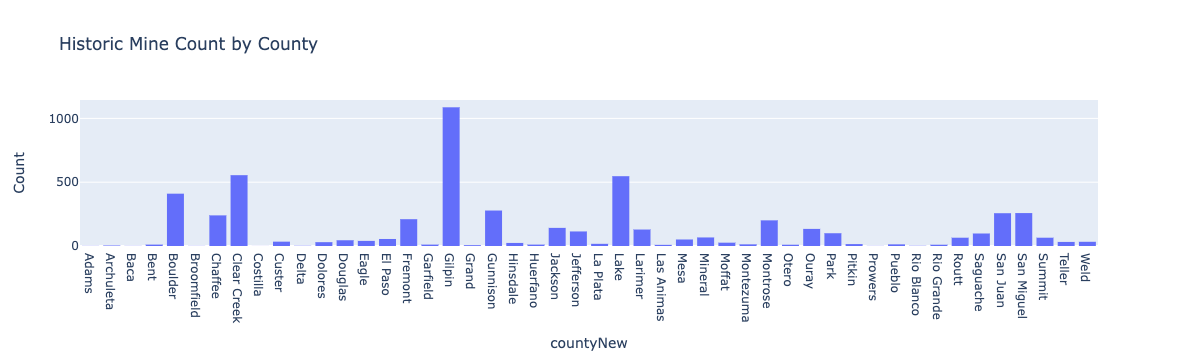

In [55]:
# a simple bar chart, putting counties on the x-axis
fig = px.bar(histcounties_gdf,
       x='countyNew',
        y= 'Count',
       title='Historic Mine Count by County'
        labels=
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [56]:
sortedhistcounties_gdf = histcounties_gdf.sort_values(by='Count',ascending = False)
sortedhistcounties_gdf.head()

geometry  TOPO_DATE  \
COUNTY                                                                      
Gilpin       MULTIPOINT (-105.63029 39.85561, -105.62920 39...    2141858   
Clear Creek  MULTIPOINT (-105.82810 39.75627, -105.82749 39...    1089387   
Lake         MULTIPOINT (-106.48344 39.11717, -106.46460 39...    1072275   
Boulder      MULTIPOINT (-105.65902 40.01106, -105.61338 39...     803255   
Gunnison     MULTIPOINT (-107.44077 38.89983, -107.38715 38...     544772   

             Count    countyNew  
COUNTY                           
Gilpin        1087       Gilpin  
Clear Creek    555  Clear Creek  
Lake           547         Lake  
Boulder        410      Boulder  
Gunnison       278     Gunnison

So it appears as if the top 5 counties that can be considered rent burdened that have the highest concentration of historic mines are Gilpin, Lake, Clear Creek, Boulder, and Gunnison counties. So these are actually some relatively urban areas, at least that they are close to come of the main metropolitan areas. So from this it doesn’t seem that my hypothesis is true. Gunnison county is an interesting one, and there is also a spike in the data around San Miguel and San Juan counties, which were some of the original areas I had been interested in. So this analysis maybe is not great for demonstrating the relationship I suspected. However, I do think I could zoom in to specific towns, rather than looking at the county level. I could also look at present economic sector data to identify towns that are reliant on tourism now that may have been associated with mines before and start looking at indicators for displacement again. 


Just making this in matplotlib as well for practice I suppose.

<AxesSubplot:title={'center':'Historic Mine Count for Rent Burdened Counties'}, xlabel='countyNew'>

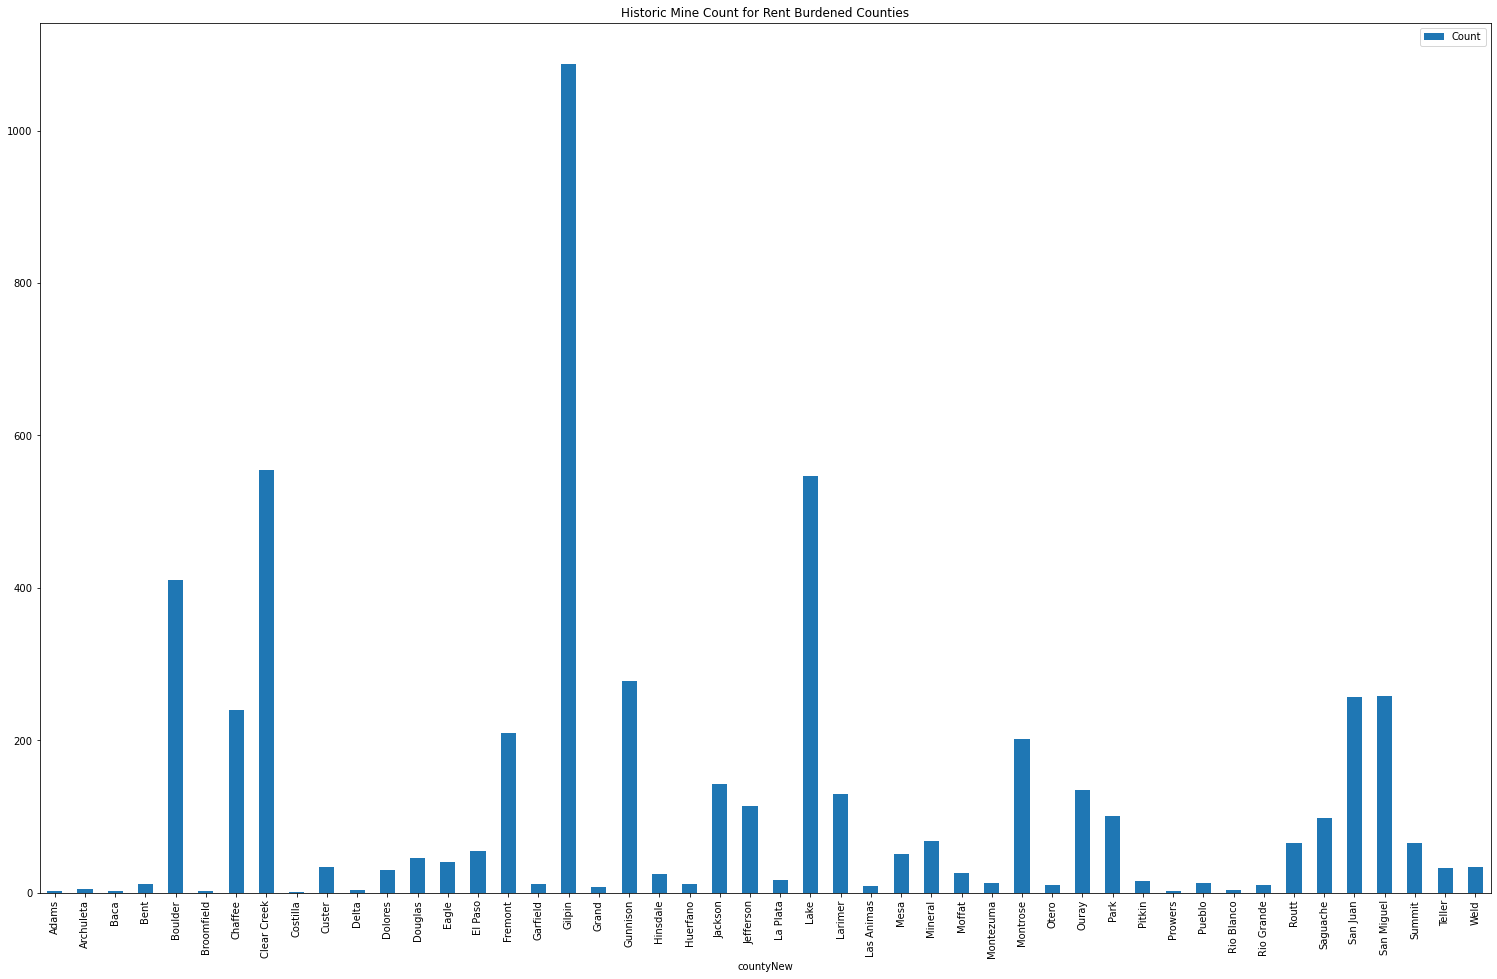

In [57]:
histcounties_gdf.plot.bar(
    figsize=(26,16), x = 'countyNew', y = ['Count'], title = 'Historic Mine Count for Rent Burdened Counties')

These charts above show the concentration of historic mines for all counties. But what about for my rent burdened counties? I'll chart those as well. First I need to convert my county data out of an index again:

In [58]:
hist_selectedcounties_gdf['county']=hist_selectedcounties_gdf.index
hist_selectedcounties_gdf.head()

geometry  TOPO_DATE  Count  \
COUNTY                                                                         
Adams    MULTIPOINT (-11594822.606 4863358.371, -115945...       3902      2   
Bent     MULTIPOINT (-11505923.370 4595069.150, -114968...      21582     11   
Boulder  MULTIPOINT (-11761908.631 4867549.913, -117568...     803255    410   
Custer   MULTIPOINT (-11750204.181 4616247.548, -117501...      66582     34   
Delta    MULTIPOINT (-12009232.802 4710758.049, -120090...       5885      3   

         index_right       Total  Less than 10.0 percent  \
COUNTY                                                     
Adams              0    112484.0                  2422.0   
Bent              22      7854.0                   253.0   
Boulder         1230  19738220.0                598600.0   
Custer           136      9656.0                   170.0   
Delta             15      9396.0                   453.0   

         10.0 to 14.9 percent  15.0 to 19.9 percent  20.0 to 24.9 percent  \
COUNTY                                                                      
Adams                  6034.0               11558.0               14962.0   
Bent                    616.0                 759.0                 363.0   
Boulder             1259930.0             2100430.0             2242290.0   
Custer                 2210.0                 544.0                 612.0   
Delta                   279.0                 540.0                 936.0   

         25.0 to 29.9 percent  ...  \
COUNTY                         ...   
Adams                 13656.0  ...   
Bent                    693.0  ...   
Boulder             1951190.0  ...   
Custer                  442.0  ...   
Delta                  1167.0  ...   

         Percent Pop. with Rent 20-24.9 percent of Income  \
COUNTY                                                      
Adams                                           26.602895   
Bent                                            50.840336   
Boulder                                       4657.658593   
Custer                                         215.492958   
Delta                                           29.885057   

         Percent Pop. with Rent 25-29.9 percent of Income  \
COUNTY                                                      
Adams                                           24.280787   
Bent                                            97.058824   
Boulder                                       4052.989074   
Custer                                         155.633803   
Delta                                           37.260536   

         Percent Pop. with Rent 30-34.9 percent of Income  \
COUNTY                                                      
Adams                                           21.332812   
Bent                                           150.980392   
Boulder                                       3622.055586   
Custer                                         383.098592   
Delta                                           17.241379   

         Percent Pop. with Rent 35-39.9 percent of Income  \
COUNTY                                                      
Adams                                           16.528573   
Bent                                           109.383754   
Boulder                                       2474.886793   
Custer                                         227.464789   
Delta                                           19.252874   

         Percent Pop. with Rent 40-49.9 percent of Income  \
COUNTY                                                      
Adams                                           21.691974   
Bent                                            78.571429   
Boulder                                       3543.704042   
Custer                                         395.070423   
Delta                                           22.796935   

         Percent Pop. with Rent 50 percent or more of Income  \
COUNTY                                                   

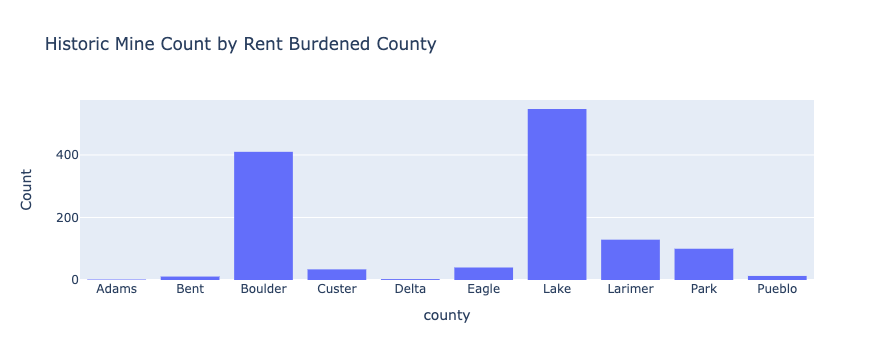

In [59]:
fig = px.bar(hist_selectedcounties_gdf,
       x='county',
        y= 'Count',
       title='Historic Mine Count by Rent Burdened County'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

Still seems like my main counties that show up as rent burdened and highly concentrated with historic mines are relatively urban. 

See my next notebook to see this turned into maps! 